In [417]:
import pandas as pd

## Import and Clean Orders

In [418]:
df_orders = pd.read_csv("data/Orders.csv")
df_orders.drop_duplicates(inplace=True)
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Mode       9994 non-null   object 
 4   Customer ID     9994 non-null   object 
 5   Customer Name   9994 non-null   object 
 6   Origin Channel  9994 non-null   object 
 7   Country/Region  9994 non-null   object 
 8   City            9994 non-null   object 
 9   State           9994 non-null   object 
 10  Postal Code     9983 non-null   float64
 11  Region          9994 non-null   object 
 12  Category        9994 non-null   object 
 13  Sub-Category    9994 non-null   object 
 14  Product ID      9994 non-null   object 
 15  Sales           9994 non-null   float64
 16  Quantity        9994 non-null   int64  
 17  Discount        9994 non-null   f

In [419]:
df_orders.columns = df_orders.columns.str.lower()
df_orders.columns = df_orders.columns.str.replace(' ','_')
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9994 non-null   int64  
 1   order_id        9994 non-null   object 
 2   order_date      9994 non-null   object 
 3   ship_mode       9994 non-null   object 
 4   customer_id     9994 non-null   object 
 5   customer_name   9994 non-null   object 
 6   origin_channel  9994 non-null   object 
 7   country/region  9994 non-null   object 
 8   city            9994 non-null   object 
 9   state           9994 non-null   object 
 10  postal_code     9983 non-null   float64
 11  region          9994 non-null   object 
 12  category        9994 non-null   object 
 13  sub-category    9994 non-null   object 
 14  product_id      9994 non-null   object 
 15  sales           9994 non-null   float64
 16  quantity        9994 non-null   int64  
 17  discount        9994 non-null   f

In [420]:
df_orders.drop(["country/region"], axis=1, inplace=True)
df_orders.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.0,3.3000
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,Email,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.0,6.1512


In [421]:
df_orders['order_date'] = pd.to_datetime(df_orders.order_date, dayfirst=True)
#pd.to_datetime(dataLake.day, dayfirst=true)

In [422]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           9994 non-null   int64         
 1   order_id        9994 non-null   object        
 2   order_date      9994 non-null   datetime64[ns]
 3   ship_mode       9994 non-null   object        
 4   customer_id     9994 non-null   object        
 5   customer_name   9994 non-null   object        
 6   origin_channel  9994 non-null   object        
 7   city            9994 non-null   object        
 8   state           9994 non-null   object        
 9   postal_code     9983 non-null   float64       
 10  region          9994 non-null   object        
 11  category        9994 non-null   object        
 12  sub-category    9994 non-null   object        
 13  product_id      9994 non-null   object        
 14  sales           9994 non-null   float64       
 15  quan

In [423]:
pd.concat(g for _, g in df_orders.groupby("order_id") if len(g) > 1)

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
6507,6289,CA-2017-100090,2017-07-08,Standard Class,EB-13705,Ed Braxton,Sales,San Francisco,California,94122.0,West,Power Muesli,Super Fibre Boost,OFF-BI-10001597,196.704,6,0.2,68.8464
8069,6288,CA-2017-100090,2017-07-08,Standard Class,EB-13705,Ed Braxton,Sales,San Francisco,California,94122.0,West,Toasted Muesli,Sweetened,FUR-TA-10003715,502.488,3,0.2,-87.9354
1173,3836,CA-2017-100363,2017-04-08,Standard Class,JM-15655,Jim Mitchum,Sales,Glendale,Arizona,85301.0,West,Power Muesli,Maple Sweetened,OFF-FA-10000611,2.368,2,0.2,0.8288
2644,3837,CA-2017-100363,2017-04-08,Standard Class,JM-15655,Jim Mitchum,Sales,Glendale,Arizona,85301.0,West,Power Muesli,Nuts and more,OFF-PA-10004733,19.008,3,0.2,6.8904
499,6572,CA-2017-100678,2017-04-18,Standard Class,KM-16720,Kunst Miller,Email,Houston,Texas,77095.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000474,227.976,3,0.2,28.4970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,5935,US-2020-169551,2020-07-07,First Class,RL-19615,Rob Lucas,Email,Philadelphia,Pennsylvania,19120.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10003033,527.920,2,0.2,85.7870
2942,5931,US-2020-169551,2020-07-07,First Class,RL-19615,Rob Lucas,Email,Philadelphia,Pennsylvania,19120.0,East,Power Muesli,Nuts and more,OFF-PA-10004100,15.552,3,0.2,5.4432
4023,5932,US-2020-169551,2020-07-07,First Class,RL-19615,Rob Lucas,Email,Philadelphia,Pennsylvania,19120.0,East,Special Projects Muesil,Only Oats,TEC-PH-10001363,683.988,2,0.4,-113.9980
5220,5933,US-2020-169551,2020-07-07,First Class,RL-19615,Rob Lucas,Email,Philadelphia,Pennsylvania,19120.0,East,Power Muesli,Steel Cut,OFF-ST-10004835,13.392,3,0.2,1.0044


In [424]:
df_orders.loc[df_orders['order_id'] == 'CA-2020-101182']

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit
2542,3080,CA-2020-101182,2020-09-04,First Class,KB-16405,Katrina Bavinger,Facebook,Apple Valley,California,92307.0,West,Power Muesli,Nuts and more,OFF-PA-10001800,12.960,2,0.0,6.2208
3772,3081,CA-2020-101182,2020-09-04,First Class,KB-16405,Katrina Bavinger,Facebook,Apple Valley,California,92307.0,West,Special Projects Muesil,Only Oats,TEC-PH-10003589,43.176,3,0.2,15.1116


In [425]:
df_orders.loc[df_orders['index'] == '4216']

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit


In [183]:
def import_and_clean(path,date_colum):
    # load csv file into df
    df = pd.read_csv('data/'+path+'.csv')

    #clean header with lowercase and replace whitespace
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','_')

    #change date column type into datetime
    df[date_colum] = pd.to_datetime(df[date_colum], dayfirst=True)
    return df
    



## Import and Clean OPD

In [426]:
df_opd = import_and_clean('OrderProcessData','order_date')
df_opd['on_truck_scan_date'] = pd.to_datetime(df_opd['on_truck_scan_date'], dayfirst=True)
df_opd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   row_id              5899 non-null   int64         
 1   order_id            5899 non-null   object        
 2   order_date          5899 non-null   datetime64[ns]
 3   on_truck_scan_date  5899 non-null   datetime64[ns]
 4   ship_mode           5899 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 230.6+ KB


In [427]:
df_opd.sort_values(by=['order_id'])

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
2124,4409,CA-2019-100041,2019-11-20,2019-11-27,Standard Processing
2123,4408,CA-2019-100041,2019-11-20,2019-11-27,Standard Processing
2122,4407,CA-2019-100041,2019-11-20,2019-11-27,Standard Processing
2202,1894,CA-2019-100083,2019-11-24,2019-12-04,Standard Processing
2415,456,CA-2019-100153,2019-12-13,2019-12-18,Standard Processing
...,...,...,...,...,...
3796,5931,US-2020-169551,2020-07-07,2020-07-10,Express
3797,5932,US-2020-169551,2020-07-07,2020-07-10,Express
3798,5933,US-2020-169551,2020-07-07,2020-07-10,Express
3799,5934,US-2020-169551,2020-07-07,2020-07-10,Express


In [428]:
df_opd.drop_duplicates(inplace=True)

__PROBLEMFALL__

In [429]:
df_opd.loc[df_opd['order_id'] == 'CA-2020-101182']

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
4216,3080,CA-2020-101182,2020-09-04,2020-09-07,Express
4217,3081,CA-2020-101182,2020-09-04,2020-09-08,Express


In [430]:
#df_opd.drop(["row_id"], axis=1, inplace=True)
df_opd.drop_duplicates(inplace=True)

## Import and Clean IDS

In [431]:
df_ids = import_and_clean('InternDataStudy','pickup_date')

In [432]:
#change date column type into datetime
df_ids = import_and_clean('InternDataStudy','pickup_date')

In [433]:
df_ids

,order_id,ready_to_ship_date,pickup_date
0,CA-2019-116540,02/09/2019,2019-09-03
1,CA-2019-116540,02/09/2019,2019-09-03
2,CA-2019-129847,04/09/2019,2019-09-04
3,CA-2019-129630,04/09/2019,2019-09-04
4,CA-2019-106278,05/09/2019,2019-09-06
...,...,...,...
285,CA-2020-105333,04/12/2020,2020-12-07
286,CA-2020-105333,04/12/2020,2020-12-07
287,US-2020-110576,04/12/2020,2020-12-07
288,CA-2020-119305,04/12/2020,2020-12-07


In [434]:
df_ids['ready_to_ship_date'] = pd.to_datetime(df_ids['ready_to_ship_date'], dayfirst=True)
df_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            290 non-null    object        
 1   ready_to_ship_date  290 non-null    datetime64[ns]
 2   pickup_date         290 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.9+ KB


In [435]:
df_ids.sort_values(by=['order_id'])

,order_id,ready_to_ship_date,pickup_date
80,CA-2019-100244,2019-09-24,2019-09-25
83,CA-2019-100244,2019-09-24,2019-09-25
79,CA-2019-100244,2019-09-24,2019-09-25
78,CA-2019-100244,2019-09-24,2019-09-25
82,CA-2019-100244,2019-09-24,2019-09-25
...,...,...,...
107,US-2020-163790,2020-11-04,2020-11-06
184,US-2020-165344,2020-11-16,2020-11-16
283,US-2020-165456,2020-12-03,2020-12-04
103,US-2020-168116,2020-11-04,2020-11-04


In [436]:
df_ids.drop_duplicates(inplace=True)

In [437]:
df_ids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            204 non-null    object        
 1   ready_to_ship_date  204 non-null    datetime64[ns]
 2   pickup_date         204 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.4+ KB


In [438]:
pd.concat(g for _, g in df_ids.groupby("order_id") if len(g) > 1)

ValueError: No objects to concatenate

## Import and Clean CD

In [439]:
df_cd=import_and_clean('Campaign Data', 'arrival_scan_date')
df_cd.drop(["customer_name"], axis=1, inplace=True)


In [440]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           333 non-null    object        
 1   arrival_scan_date  333 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 5.3+ KB


In [441]:
df_cd.sort_values(by=['order_id'])

,order_id,arrival_scan_date
222,CA-2019-100041,2019-12-02
237,CA-2019-100083,2019-12-09
131,CA-2019-100244,2019-09-30
236,CA-2019-100468,2019-12-09
55,CA-2019-100510,2019-05-28
...,...,...
332,US-2020-139647,2020-05-15
283,US-2020-148551,2020-01-22
284,US-2020-158512,2020-01-27
298,US-2020-163195,2020-03-02


In [442]:
#check dupliactes order_id
pd.concat(g for _, g in df_cd.groupby("order_id") if len(g) > 1)

ValueError: No objects to concatenate

In [443]:
df_cd.drop_duplicates(inplace=True)

In [444]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           333 non-null    object        
 1   arrival_scan_date  333 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 7.8+ KB


## Merging Big Beautiful Data Tree

In [474]:
#big_beautiful_data_tree = df_orders.merge(df_opd, 
                        #left_on='index',
                        #right_on='row_id',
                        #how ='left',  
                     #) 
#big_beautiful_data_tree

big_beautiful_data_tree = df_orders.merge(df_opd[['row_id','on_truck_scan_date']],
                     left_on='index',
                     right_on='row_id',
                     how ='left',  
                     ) 
big_beautiful_data_tree

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,row_id,on_truck_scan_date
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,27.0,2019-01-23
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,45.0,2019-03-13
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,48.0,2019-06-26
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.000,2,0.0,3.3000,60.0,2019-06-19
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.980,2,0.0,6.1512,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9894,US-2019-115441,2019-07-25,Second Class,SH-19975,Sally Hughsby,Sales,Milwaukee,Wisconsin,53209.0,Central,Toasted Muesli,With Nuts,FUR-CH-10004626,403.560,4,0.0,96.8544,9894.0,2019-07-31
9990,9908,US-2018-129007,2018-09-13,First Class,KD-16615,Ken Dana,Sales,Anaheim,California,92804.0,West,Toasted Muesli,With Nuts,FUR-CH-10000155,717.720,3,0.2,71.7720,NaN,NaT
9991,9913,CA-2018-132388,2018-10-10,First Class,KN-16390,Katherine Nockton,Sales,Santa Barbara,California,93101.0,West,Toasted Muesli,With Nuts,FUR-CH-10001714,362.136,3,0.2,-54.3204,NaN,NaT
9992,9920,CA-2019-149272,2019-03-15,Standard Class,MY-18295,Muhammed Yedwab,Sales,Bryan,Texas,77803.0,Central,Toasted Muesli,With Nuts,FUR-CH-10000863,528.430,5,0.3,-143.4310,9920.0,2019-03-20


In [446]:
big_beautiful_data_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               9994 non-null   int64         
 1   order_id            9994 non-null   object        
 2   order_date          9994 non-null   datetime64[ns]
 3   ship_mode           9994 non-null   object        
 4   customer_id         9994 non-null   object        
 5   customer_name       9994 non-null   object        
 6   origin_channel      9994 non-null   object        
 7   city                9994 non-null   object        
 8   state               9994 non-null   object        
 9   postal_code         9983 non-null   float64       
 10  region              9994 non-null   object        
 11  category            9994 non-null   object        
 12  sub-category        9994 non-null   object        
 13  product_id          9994 non-null   object      

In [447]:
big_beautiful_data_tree.loc[big_beautiful_data_tree['order_id'] == 'CA-2020-101182']

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,region,category,sub-category,product_id,sales,quantity,discount,profit,row_id,on_truck_scan_date
2542,3080,CA-2020-101182,2020-09-04,First Class,KB-16405,Katrina Bavinger,Facebook,Apple Valley,California,92307.0,West,Power Muesli,Nuts and more,OFF-PA-10001800,12.960,2,0.0,6.2208,3080.0,2020-09-07
3772,3081,CA-2020-101182,2020-09-04,First Class,KB-16405,Katrina Bavinger,Facebook,Apple Valley,California,92307.0,West,Special Projects Muesil,Only Oats,TEC-PH-10003589,43.176,3,0.2,15.1116,3081.0,2020-09-08


In [475]:
big_beautiful_data_tree = big_beautiful_data_tree.join(df_ids.set_index('order_id'), on='order_id')

In [476]:
big_beautiful_data_tree

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,...,sub-category,product_id,sales,quantity,discount,profit,row_id,on_truck_scan_date,ready_to_ship_date,pickup_date
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,Los Angeles,California,90049.0,...,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,27.0,2019-01-23,NaT,NaT
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,Eagan,Minnesota,55122.0,...,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,45.0,2019-03-13,NaT,NaT
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,Dover,Delaware,19901.0,...,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,48.0,2019-06-26,NaT,NaT
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,Troy,New York,12180.0,...,Gluten Free,TEC-AC-10002167,30.000,2,0.0,3.3000,60.0,2019-06-19,NaT,NaT
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,Los Angeles,California,90004.0,...,Gluten Free,TEC-AC-10004633,13.980,2,0.0,6.1512,NaN,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9894,US-2019-115441,2019-07-25,Second Class,SH-19975,Sally Hughsby,Sales,Milwaukee,Wisconsin,53209.0,...,With Nuts,FUR-CH-10004626,403.560,4,0.0,96.8544,9894.0,2019-07-31,NaT,NaT
9990,9908,US-2018-129007,2018-09-13,First Class,KD-16615,Ken Dana,Sales,Anaheim,California,92804.0,...,With Nuts,FUR-CH-10000155,717.720,3,0.2,71.7720,NaN,NaT,NaT,NaT
9991,9913,CA-2018-132388,2018-10-10,First Class,KN-16390,Katherine Nockton,Sales,Santa Barbara,California,93101.0,...,With Nuts,FUR-CH-10001714,362.136,3,0.2,-54.3204,NaN,NaT,NaT,NaT
9992,9920,CA-2019-149272,2019-03-15,Standard Class,MY-18295,Muhammed Yedwab,Sales,Bryan,Texas,77803.0,...,With Nuts,FUR-CH-10000863,528.430,5,0.3,-143.4310,9920.0,2019-03-20,NaT,NaT


In [477]:
big_beautiful_data_tree = big_beautiful_data_tree.join(df_cd.set_index('order_id'), on='order_id')
big_beautiful_data_tree

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,...,product_id,sales,quantity,discount,profit,row_id,on_truck_scan_date,ready_to_ship_date,pickup_date,arrival_scan_date
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,Los Angeles,California,90049.0,...,TEC-AC-10003027,90.570,3,0.0,11.7741,27.0,2019-01-23,NaT,NaT,NaT
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,Eagan,Minnesota,55122.0,...,TEC-AC-10000171,45.980,2,0.0,19.7714,45.0,2019-03-13,NaT,NaT,NaT
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,Dover,Delaware,19901.0,...,TEC-AC-10002167,45.000,3,0.0,4.9500,48.0,2019-06-26,NaT,NaT,NaT
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,Troy,New York,12180.0,...,TEC-AC-10002167,30.000,2,0.0,3.3000,60.0,2019-06-19,NaT,NaT,NaT
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,Los Angeles,California,90004.0,...,TEC-AC-10004633,13.980,2,0.0,6.1512,NaN,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9894,US-2019-115441,2019-07-25,Second Class,SH-19975,Sally Hughsby,Sales,Milwaukee,Wisconsin,53209.0,...,FUR-CH-10004626,403.560,4,0.0,96.8544,9894.0,2019-07-31,NaT,NaT,NaT
9990,9908,US-2018-129007,2018-09-13,First Class,KD-16615,Ken Dana,Sales,Anaheim,California,92804.0,...,FUR-CH-10000155,717.720,3,0.2,71.7720,NaN,NaT,NaT,NaT,NaT
9991,9913,CA-2018-132388,2018-10-10,First Class,KN-16390,Katherine Nockton,Sales,Santa Barbara,California,93101.0,...,FUR-CH-10001714,362.136,3,0.2,-54.3204,NaN,NaT,NaT,NaT,NaT
9992,9920,CA-2019-149272,2019-03-15,Standard Class,MY-18295,Muhammed Yedwab,Sales,Bryan,Texas,77803.0,...,FUR-CH-10000863,528.430,5,0.3,-143.4310,9920.0,2019-03-20,NaT,NaT,NaT


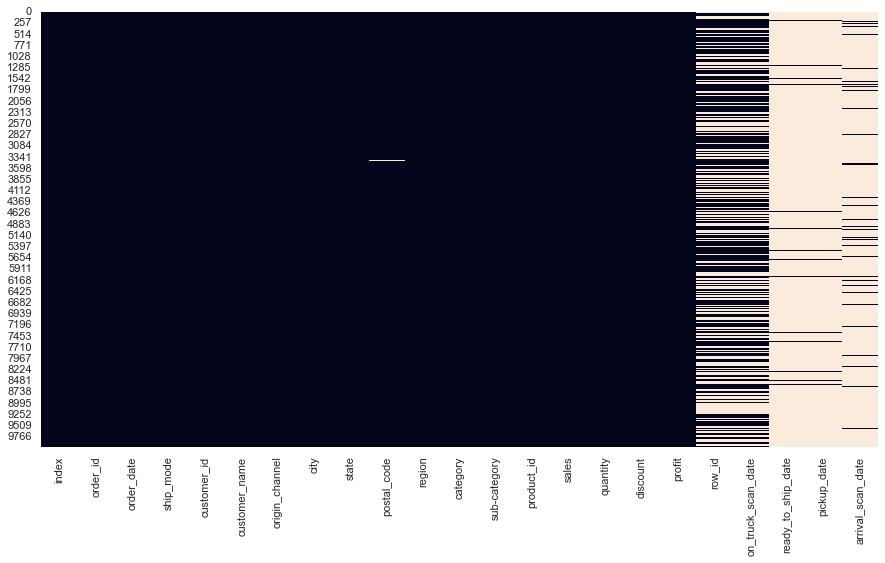

In [478]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(big_beautiful_data_tree.isnull(), cbar=False);

In [481]:
big_beautiful_data_tree['ship_mode'] = big_beautiful_data_tree['ship_mode'].str.replace('Second Class', 'Standard Processing')
big_beautiful_data_tree['ship_mode'] = big_beautiful_data_tree['ship_mode'].str.replace('Standard Class', 'Standard Processing')
big_beautiful_data_tree['ship_mode'] = big_beautiful_data_tree['ship_mode'].str.replace('First Class', 'Express')
big_beautiful_data_tree[['postal_code']] = big_beautiful_data_tree[['postal_code']].fillna(value=0)

In [482]:
big_beautiful_data_tree

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,city,state,postal_code,...,product_id,sales,quantity,discount,profit,row_id,on_truck_scan_date,ready_to_ship_date,pickup_date,arrival_scan_date
0,27,CA-2019-121755,2019-01-16,Standard Processing,EH-13945,Eric Hoffmann,Email,Los Angeles,California,90049.0,...,TEC-AC-10003027,90.570,3,0.0,11.7741,27.0,2019-01-23,NaT,NaT,NaT
1,45,CA-2019-118255,2019-03-11,Express,ON-18715,Odella Nelson,Sales,Eagan,Minnesota,55122.0,...,TEC-AC-10000171,45.980,2,0.0,19.7714,45.0,2019-03-13,NaT,NaT,NaT
2,48,CA-2019-169194,2019-06-20,Standard Processing,LH-16900,Lena Hernandez,Email,Dover,Delaware,19901.0,...,TEC-AC-10002167,45.000,3,0.0,4.9500,48.0,2019-06-26,NaT,NaT,NaT
3,60,CA-2019-111682,2019-06-17,Express,TB-21055,Ted Butterfield,Email,Troy,New York,12180.0,...,TEC-AC-10002167,30.000,2,0.0,3.3000,60.0,2019-06-19,NaT,NaT,NaT
4,63,CA-2018-135545,2018-11-24,Standard Processing,KM-16720,Kunst Miller,Email,Los Angeles,California,90004.0,...,TEC-AC-10004633,13.980,2,0.0,6.1512,NaN,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9894,US-2019-115441,2019-07-25,Standard Processing,SH-19975,Sally Hughsby,Sales,Milwaukee,Wisconsin,53209.0,...,FUR-CH-10004626,403.560,4,0.0,96.8544,9894.0,2019-07-31,NaT,NaT,NaT
9990,9908,US-2018-129007,2018-09-13,Express,KD-16615,Ken Dana,Sales,Anaheim,California,92804.0,...,FUR-CH-10000155,717.720,3,0.2,71.7720,NaN,NaT,NaT,NaT,NaT
9991,9913,CA-2018-132388,2018-10-10,Express,KN-16390,Katherine Nockton,Sales,Santa Barbara,California,93101.0,...,FUR-CH-10001714,362.136,3,0.2,-54.3204,NaN,NaT,NaT,NaT,NaT
9992,9920,CA-2019-149272,2019-03-15,Standard Processing,MY-18295,Muhammed Yedwab,Sales,Bryan,Texas,77803.0,...,FUR-CH-10000863,528.430,5,0.3,-143.4310,9920.0,2019-03-20,NaT,NaT,NaT


### Full tracked orders

In [483]:
full_tracking_orders = big_beautiful_data_tree.dropna()

In [487]:
full_tracking_orders.loc[full_tracking_orders['ship_mode'] == 'Standard Processing'].describe()

,index,postal_code,sales,quantity,discount,profit,row_id
count,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000
mean,4126.628571,52051.942857,225.18340,3.457143,0.134286,33.622971,4126.628571
std,2873.670732,36500.378220,580.56876,2.616046,0.181404,113.283537,2873.670732
min,99.000000,7050.000000,2.90700,1.000000,0.000000,-157.938300,99.000000
25%,2057.000000,10035.000000,11.97600,2.000000,0.000000,3.117600,2057.000000
50%,3413.000000,43130.000000,60.60000,3.000000,0.000000,8.922000,3413.000000
75%,5744.500000,93079.500000,131.72400,4.500000,0.200000,30.627600,5744.500000
max,9973.000000,98198.000000,3347.37000,13.000000,0.700000,636.000300,9973.000000


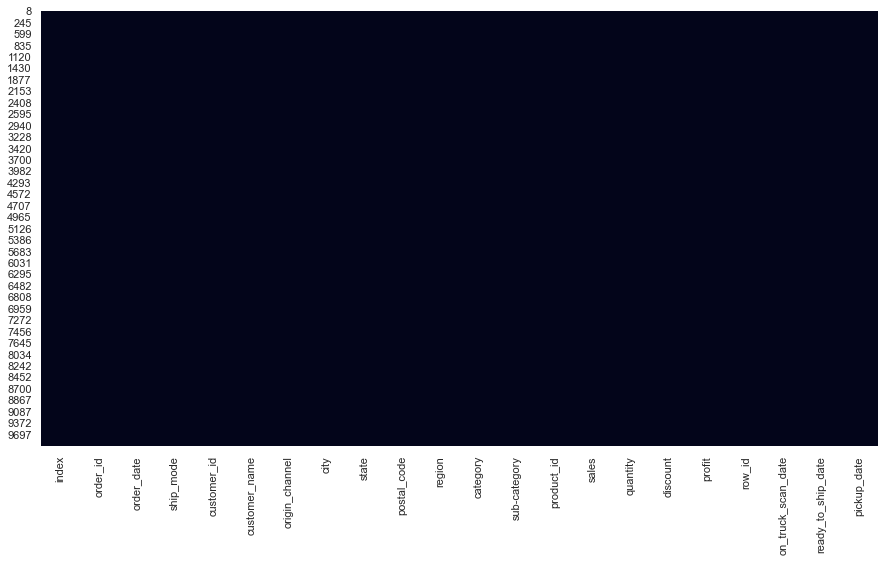

In [457]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(full_tracking_orders.isnull(), cbar=False);

### check if on_truck_scan_date = pickup_date

In [458]:
whats_the_difference =(big_beautiful_data_tree["on_truck_scan_date"]-big_beautiful_data_tree["pickup_date"]).dt.days
#whats_the_difference.dropna()
whats_the_difference = whats_the_difference.dropna()
whats_the_difference = whats_the_difference.reset_index(drop=True)
whats_the_difference.describe()



count    418.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [459]:
big_beautiful_data_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               9994 non-null   int64         
 1   order_id            9994 non-null   object        
 2   order_date          9994 non-null   datetime64[ns]
 3   ship_mode           9994 non-null   object        
 4   customer_id         9994 non-null   object        
 5   customer_name       9994 non-null   object        
 6   origin_channel      9994 non-null   object        
 7   city                9994 non-null   object        
 8   state               9994 non-null   object        
 9   postal_code         9983 non-null   float64       
 10  region              9994 non-null   object        
 11  category            9994 non-null   object        
 12  sub-category        9994 non-null   object        
 13  product_id          9994 non-null   object      

In [493]:
process_tracking = big_beautiful_data_tree.iloc[: , [0,1,3]].copy()

### Process Time ready_to_ship - order_date

In [494]:
process_tracking['process_time']=(big_beautiful_data_tree["ready_to_ship_date"]-big_beautiful_data_tree["order_date"]).dt.days
process_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         9994 non-null   int64  
 1   order_id      9994 non-null   object 
 2   ship_mode     9994 non-null   object 
 3   process_time  418 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 390.4+ KB


### Pick Up Time pick_up_time - order_date

In [495]:
process_tracking['pick_up_time']=(big_beautiful_data_tree["pickup_date"]-big_beautiful_data_tree["order_date"]).dt.days
process_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         9994 non-null   int64  
 1   order_id      9994 non-null   object 
 2   ship_mode     9994 non-null   object 
 3   process_time  418 non-null    float64
 4   pick_up_time  418 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 468.5+ KB


### Probe on_truck_scan = pickup_time

### On_Truck_Time_order = on_truck_scan_date - order_date

In [496]:
whats_the_difference =(big_beautiful_data_tree["on_truck_scan_date"]-big_beautiful_data_tree["pickup_date"]).dt.days
#whats_the_difference.dropna()
whats_the_difference = whats_the_difference.dropna()
whats_the_difference = whats_the_difference.reset_index(drop=True)
whats_the_difference.describe()

count    418.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [497]:
process_tracking['when_on_truck']=(big_beautiful_data_tree["on_truck_scan_date"]-big_beautiful_data_tree["order_date"]).dt.days
process_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   ship_mode      9994 non-null   object 
 3   process_time   418 non-null    float64
 4   pick_up_time   418 non-null    float64
 5   when_on_truck  5899 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 546.5+ KB


### Time Order is laying around in Warehouse

In [498]:
process_tracking['warehouse_time']=(big_beautiful_data_tree["on_truck_scan_date"]-big_beautiful_data_tree["ready_to_ship_date"]).dt.days
process_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9994 non-null   int64  
 1   order_id        9994 non-null   object 
 2   ship_mode       9994 non-null   object 
 3   process_time    418 non-null    float64
 4   pick_up_time    418 non-null    float64
 5   when_on_truck   5899 non-null   float64
 6   warehouse_time  418 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 624.6+ KB


In [499]:
process_tracking['delivery_time']=(big_beautiful_data_tree["arrival_scan_date"]-big_beautiful_data_tree["on_truck_scan_date"]).dt.days
process_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9994 non-null   int64  
 1   order_id        9994 non-null   object 
 2   ship_mode       9994 non-null   object 
 3   process_time    418 non-null    float64
 4   pick_up_time    418 non-null    float64
 5   when_on_truck   5899 non-null   float64
 6   warehouse_time  418 non-null    float64
 7   delivery_time   668 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 702.7+ KB


In [500]:
process_tracking['fullprocess']=(big_beautiful_data_tree["arrival_scan_date"]-big_beautiful_data_tree["order_date"]).dt.days
process_tracking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9994 non-null   int64  
 1   order_id        9994 non-null   object 
 2   ship_mode       9994 non-null   object 
 3   process_time    418 non-null    float64
 4   pick_up_time    418 non-null    float64
 5   when_on_truck   5899 non-null   float64
 6   warehouse_time  418 non-null    float64
 7   delivery_time   668 non-null    float64
 8   fullprocess     668 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 780.8+ KB


In [501]:
#process_tracking.drop('arrival_time', axis=1, inplace=True)
process_tracking['ship_mode'] = big_beautiful_data_tree['ship_mode'].str.replace('First Class', 'Express')

In [403]:
process_tracking

,index,order_id,ship_mode,process_time,pick_up_time,on_truck_time,ready_to_truck,ready_to_ship_on_truck,when_on_truck,warehouse_time,delivery_time,fullprocess
0,27,CA-2019-121755,Standard Processing,NaN,NaN,NaN,7.0,NaN,7.0,NaN,NaN,NaN
1,45,CA-2019-118255,Express,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN
2,48,CA-2019-169194,Standard Processing,NaN,NaN,NaN,6.0,NaN,6.0,NaN,NaN,NaN
3,60,CA-2019-111682,Express,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN
4,63,CA-2018-135545,Standard Processing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9894,US-2019-115441,Standard Processing,NaN,NaN,NaN,6.0,NaN,6.0,NaN,NaN,NaN
9990,9908,US-2018-129007,Express,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9991,9913,CA-2018-132388,Express,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9992,9920,CA-2019-149272,Standard Processing,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN


In [502]:
process_tracking.loc[process_tracking['ship_mode'] == 'Standard Processing'].describe()

,index,process_time,pick_up_time,when_on_truck,warehouse_time,delivery_time,fullprocess
count,7913.000000,316.000000,316.000000,4596.000000,316.000000,520.000000,520.000000
mean,5012.192847,4.882911,6.930380,7.127502,2.047468,4.553846,11.936538
std,2876.558460,1.385489,1.557846,1.651674,0.695308,1.146741,2.031024
min,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,6.000000
25%,2548.000000,4.000000,6.000000,6.000000,2.000000,4.000000,11.000000
50%,5007.000000,5.000000,7.000000,7.000000,2.000000,5.000000,12.000000
75%,7483.000000,6.000000,8.000000,8.000000,3.000000,5.000000,13.000000
max,9994.000000,8.000000,10.000000,12.000000,3.000000,7.000000,17.000000


In [504]:
process_time_standard=process_tracking.loc[process_tracking['ship_mode'] == 'Standard Processing']

In [522]:
process_time_standard=process_time_standard.dropna()

In [523]:
process_time_standard.describe()

,index,process_time,pick_up_time,when_on_truck,warehouse_time,delivery_time,fullprocess
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,4126.628571,4.571429,6.285714,6.285714,1.714286,4.628571,10.914286
std,2873.670732,1.170362,1.250210,1.250210,0.572478,0.731063,1.541035
min,99.000000,2.000000,4.000000,4.000000,1.000000,3.000000,8.000000
25%,2057.000000,4.000000,5.000000,5.000000,1.000000,5.000000,10.000000
50%,3413.000000,5.000000,7.000000,7.000000,2.000000,5.000000,11.000000
75%,5744.500000,5.500000,7.000000,7.000000,2.000000,5.000000,12.000000
max,9973.000000,6.000000,8.000000,8.000000,3.000000,5.000000,13.000000


In [524]:
process_time_express=process_tracking.loc[process_tracking['ship_mode'] == 'Express']

In [525]:
process_time_express=process_time_express.dropna()

In [527]:
process_time_express.describe()

,index,process_time,pick_up_time,when_on_truck,warehouse_time,delivery_time,fullprocess
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,4921.500000,1.333333,1.666667,1.666667,0.333333,5.166667,6.833333
std,4527.351135,1.032796,1.366260,1.366260,0.516398,0.408248,1.471960
min,870.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
25%,901.250000,0.500000,0.500000,0.500000,0.000000,5.000000,5.500000
50%,3964.500000,2.000000,2.000000,2.000000,0.000000,5.000000,7.500000
75%,9181.000000,2.000000,2.750000,2.750000,0.750000,5.000000,8.000000
max,9930.000000,2.000000,3.000000,3.000000,1.000000,6.000000,8.000000


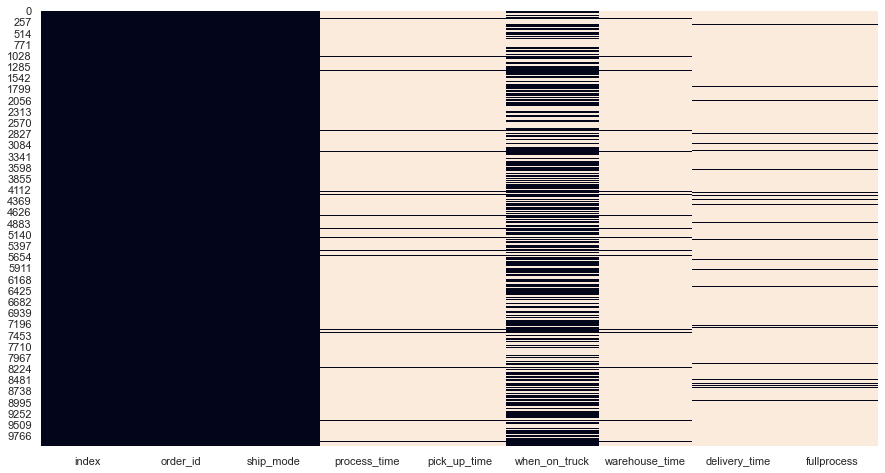

In [503]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(process_tracking.isnull(), cbar=False);

### Full Tracking

In [537]:
process_time_cleaned=process_tracking.dropna()

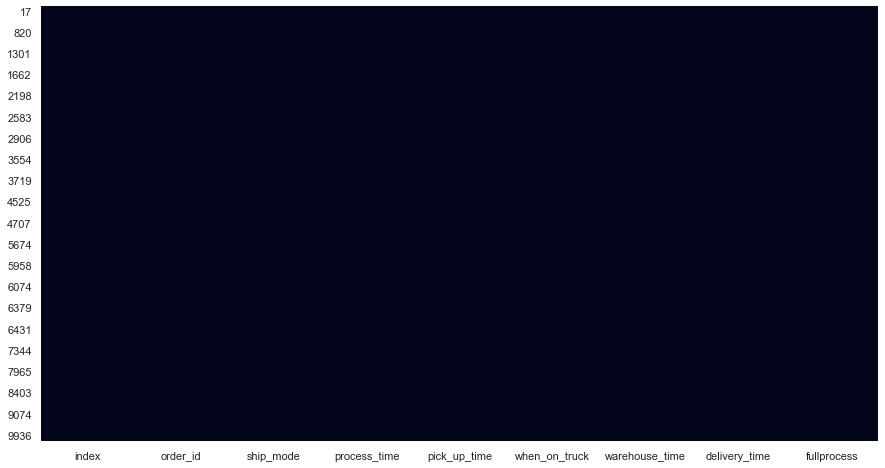

In [538]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(process_time_cleaned.isnull(), cbar=False);

In [546]:
process_time_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 17 to 9936
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           41 non-null     int64  
 1   ship_mode       41 non-null     object 
 2   process_time    41 non-null     float64
 3   pick_up_time    41 non-null     float64
 4   when_on_truck   41 non-null     float64
 5   warehouse_time  41 non-null     float64
 6   delivery_time   41 non-null     float64
 7   fullprocess     41 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.9+ KB


In [543]:
process_time_cleaned.drop(["order_id"], axis=1, inplace=True)

/var/folders/gk/b3tkk4h10tscwyv9t470y61h0000gn/T/ipykernel_18903/2168173427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  process_time_cleaned.drop(["order_id"], axis=1, inplace=True)


In [545]:
process_time_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 17 to 9936
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           41 non-null     int64  
 1   ship_mode       41 non-null     object 
 2   process_time    41 non-null     float64
 3   pick_up_time    41 non-null     float64
 4   when_on_truck   41 non-null     float64
 5   warehouse_time  41 non-null     float64
 6   delivery_time   41 non-null     float64
 7   fullprocess     41 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.9+ KB


In [561]:
process_time_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 17 to 9936
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           41 non-null     int64  
 1   ship_mode       41 non-null     object 
 2   process_time    41 non-null     float64
 3   pick_up_time    41 non-null     float64
 4   when_on_truck   41 non-null     float64
 5   warehouse_time  41 non-null     float64
 6   delivery_time   41 non-null     float64
 7   fullprocess     41 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.9+ KB


In [570]:
process_time_cleaned['process_time'] = process_time_cleaned['process_time'].astype(int)
process_time_cleaned['pick_up_time'] = process_time_cleaned['pick_up_time'].astype(int)
process_time_cleaned['when_on_truck'] = process_time_cleaned['when_on_truck'].astype(int)
process_time_cleaned['warehouse_time'] = process_time_cleaned['warehouse_time'].astype(int)
process_time_cleaned['delivery_time'] = process_time_cleaned['delivery_time'].astype(int)
process_time_cleaned['fullprocess'] = process_time_cleaned['fullprocess'].astype(int)


/var/folders/gk/b3tkk4h10tscwyv9t470y61h0000gn/T/ipykernel_18903/111356970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  process_time_cleaned['process_time'] = process_time_cleaned['process_time'].astype(int)
/var/folders/gk/b3tkk4h10tscwyv9t470y61h0000gn/T/ipykernel_18903/111356970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  process_time_cleaned['pick_up_time'] = process_time_cleaned['pick_up_time'].astype(int)
/var/folders/gk/b3tkk4h10tscwyv9t470y61h0000gn/T/ipykernel_18903/111356970.py:3: S

In [595]:
process_time_cleaned

,index,ship_mode,process_time,pick_up_time,when_on_truck,warehouse_time,delivery_time,fullprocess
17,252,Standard Processing,6,7,7,1,5,12
85,1042,Standard Processing,3,5,5,2,5,10
820,2882,Standard Processing,4,6,6,2,5,11
871,5333,Standard Processing,5,7,7,2,5,12
1301,99,Standard Processing,5,7,7,2,4,11
1555,5808,Standard Processing,5,7,7,2,5,12
1662,8046,Standard Processing,4,5,5,1,5,10
2157,251,Standard Processing,6,7,7,1,5,12
2198,613,Standard Processing,2,5,5,3,3,8
2332,1620,Standard Processing,6,8,8,2,5,13


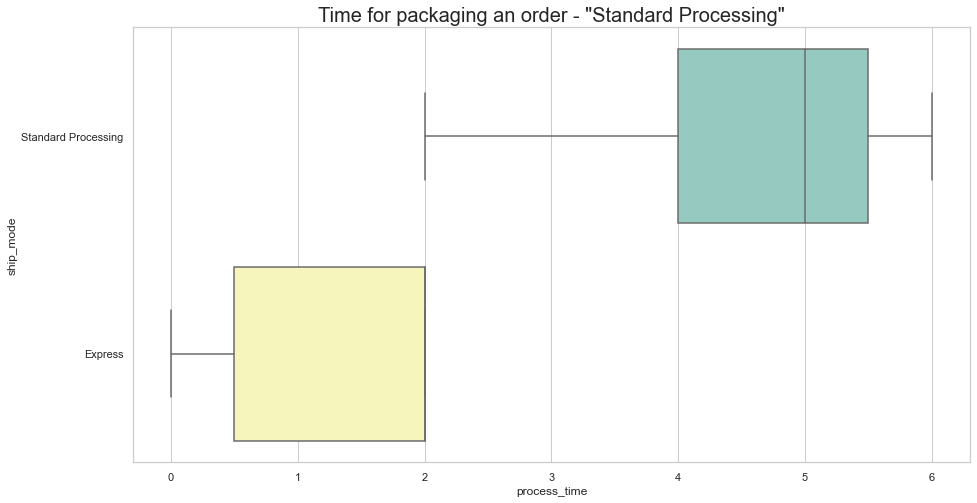

In [609]:
#process_tracking['process_time']=(big_beautiful_data_tree["ready_to_ship_date"]-big_beautiful_data_tree["order_date"]).dt.days
sns.boxplot( y=process_time_cleaned["ship_mode"], x=process_time_cleaned["process_time"],palette="Set3" ).set_title('Time for packaging an order', fontsize = 20);
plt.show()

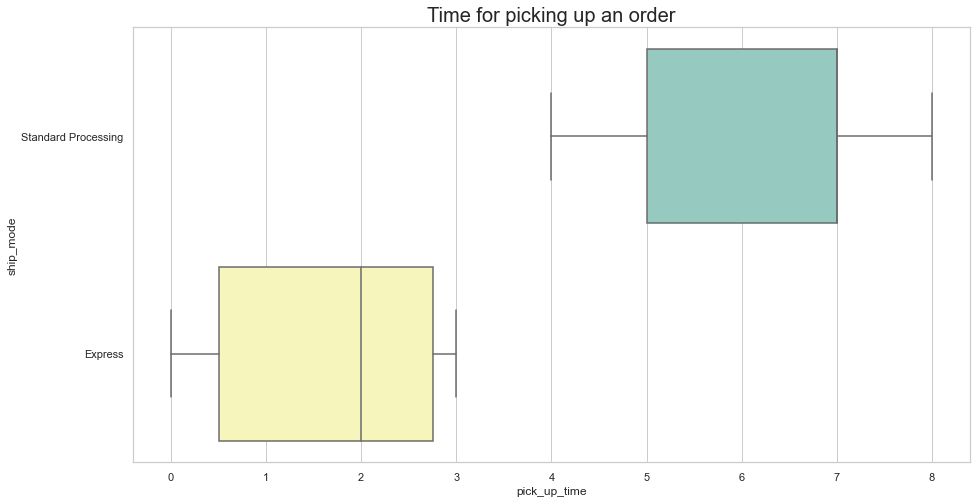

In [612]:
#process_tracking['pick_up_time']=(big_beautiful_data_tree["pickup_date"]-big_beautiful_data_tree["order_date"]).dt.days
sns.boxplot( y=process_time_cleaned["ship_mode"], x=process_time_cleaned["pick_up_time"],palette="Set3" ).set_title('Time for picking up an order', fontsize = 20);
plt.show()

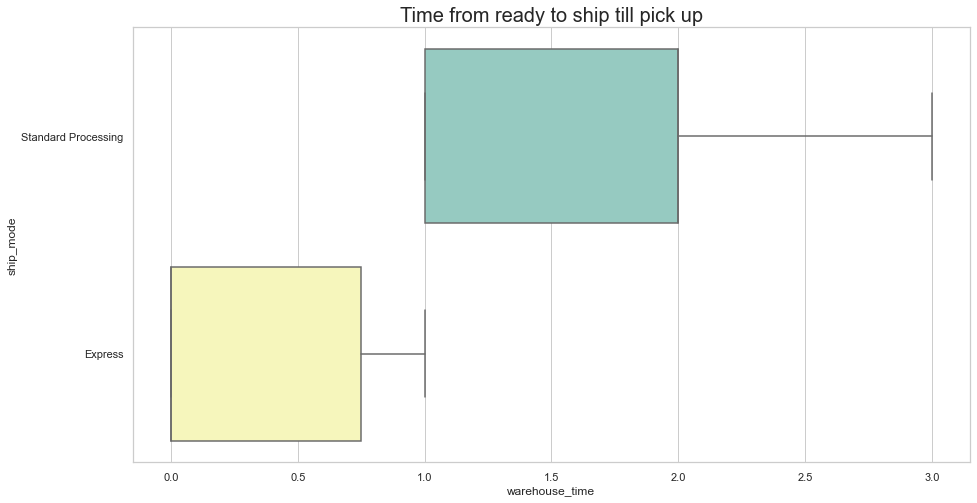

In [617]:
process_tracking['warehouse_time']=(big_beautiful_data_tree["on_truck_scan_date"]-big_beautiful_data_tree["ready_to_ship_date"]).dt.days
sns.boxplot( y=process_time_cleaned["ship_mode"], x=process_time_cleaned["warehouse_time"],palette="Set3" ).set_title('Time from ready to ship till pick up', fontsize = 20);
plt.show()

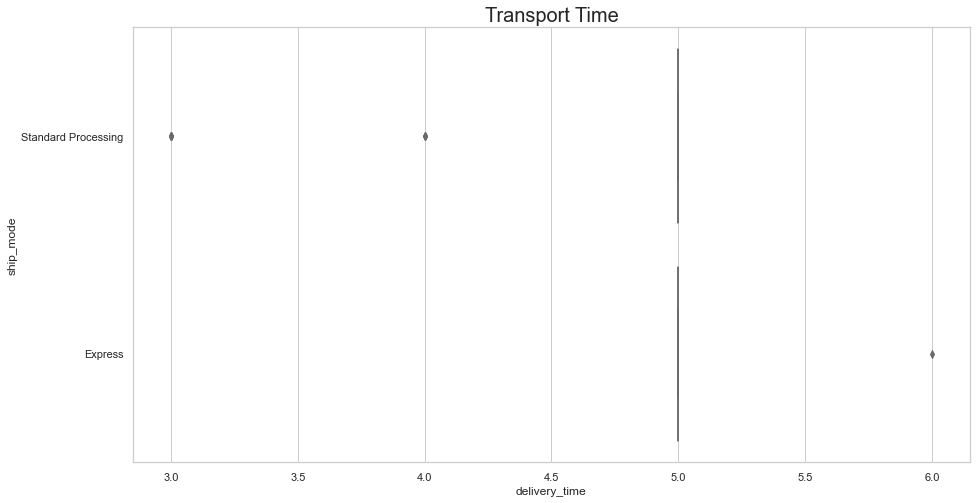

In [619]:
#process_tracking['delivery_time']=(big_beautiful_data_tree["arrival_scan_date"]-big_beautiful_data_tree["on_truck_scan_date"]).dt.days
#process_tracking.info()

sns.boxplot( y=process_time_cleaned["ship_mode"], x=process_time_cleaned["delivery_time"],palette="Set3" ).set_title('Transport Time', fontsize = 20);
plt.show()

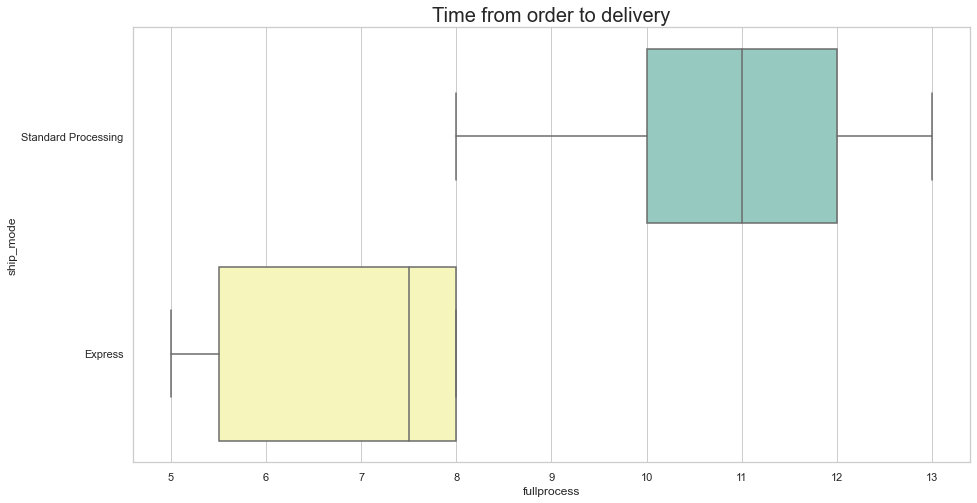

In [623]:
#process_tracking['fullprocess']=(big_beautiful_data_tree["arrival_scan_date"]-big_beautiful_data_tree["order_date"]).dt.days
#process_tracking.info()
sns.boxplot( y=process_time_cleaned["ship_mode"], x=process_time_cleaned["fullprocess"],palette="Set3" ).set_title('Time from order to delivery', fontsize = 20);
plt.show()

In [ ]:
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
                 data=tips, palette="Set3")

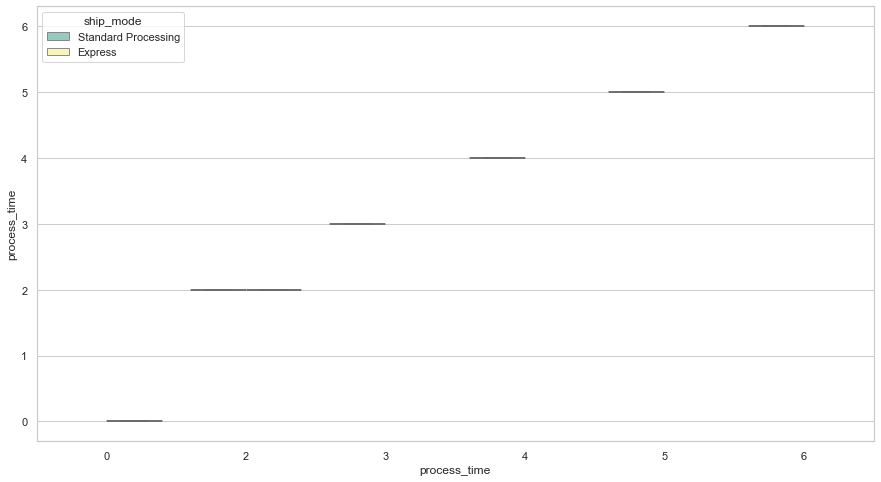

In [602]:
ax = sns.boxplot(x='process_time',y="process_time", hue="ship_mode",
                 data=process_time_cleaned, palette="Set3")

In [593]:
process_time_cleaned_standard = process_time_cleaned[process_time_cleaned.ship_mode=='Standard Processing']
process_time_cleaned_express = process_time_cleaned[process_time_cleaned.ship_mode=='Express']

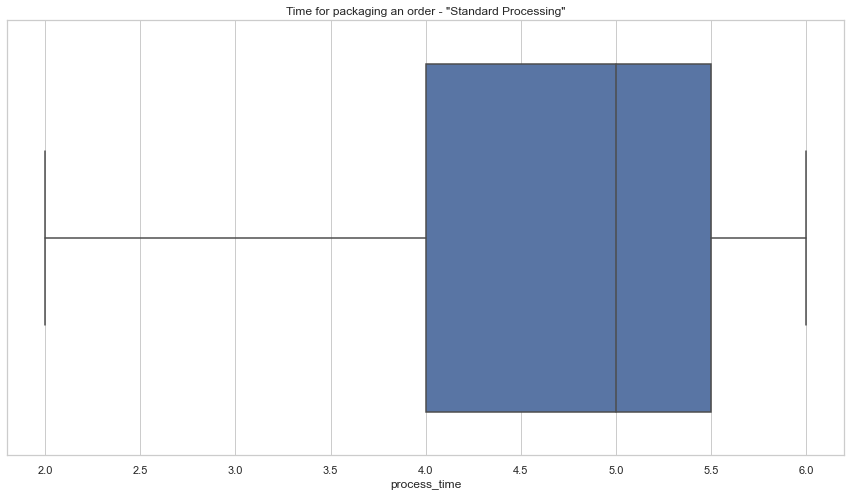

In [578]:
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset(process_time_cleaned)
ax = sns.boxplot(x=process_time_cleaned_standard["process_time"]).set_title('Time for packaging an order - "Standard Processing"')

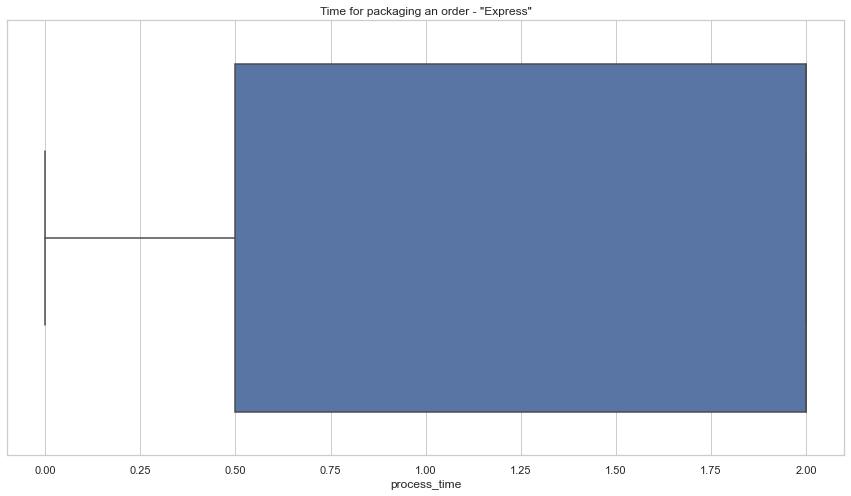

In [580]:
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset(process_time_cleaned)
ax = sns.boxplot(x=process_time_cleaned_express["process_time"]).set_title('Time for packaging an order - "Express"')

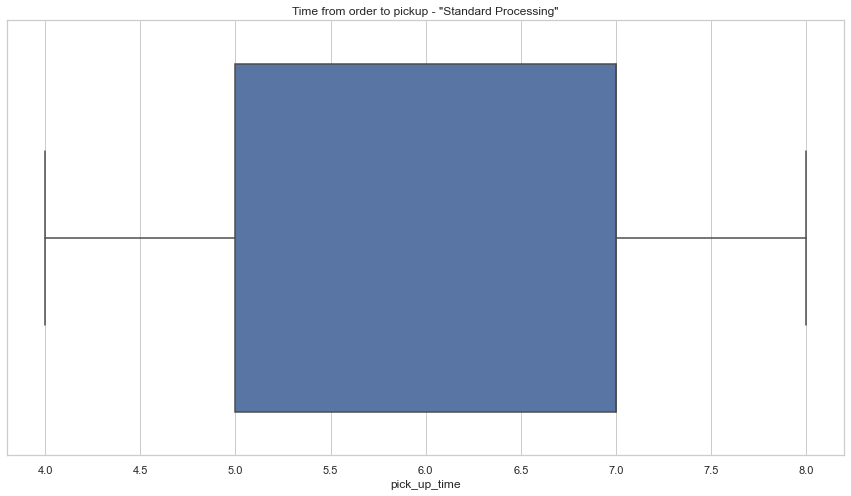

In [582]:
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset(process_time_cleaned)
ax = sns.boxplot(x=process_time_cleaned_standard["pick_up_time"]).set_title('Time from order to pickup - "Standard Processing"')

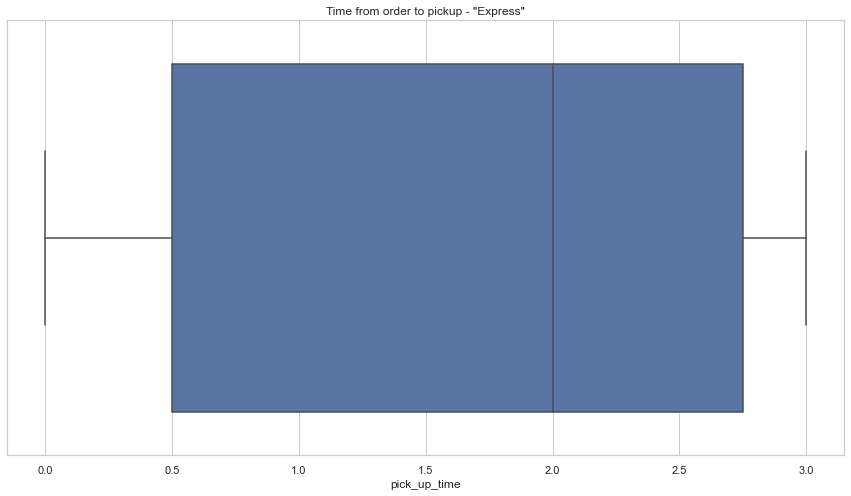

In [585]:
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset(process_time_cleaned)
ax = sns.boxplot(x=process_time_cleaned_express["pick_up_time"]).set_title('Time from order to pickup - "Express"')

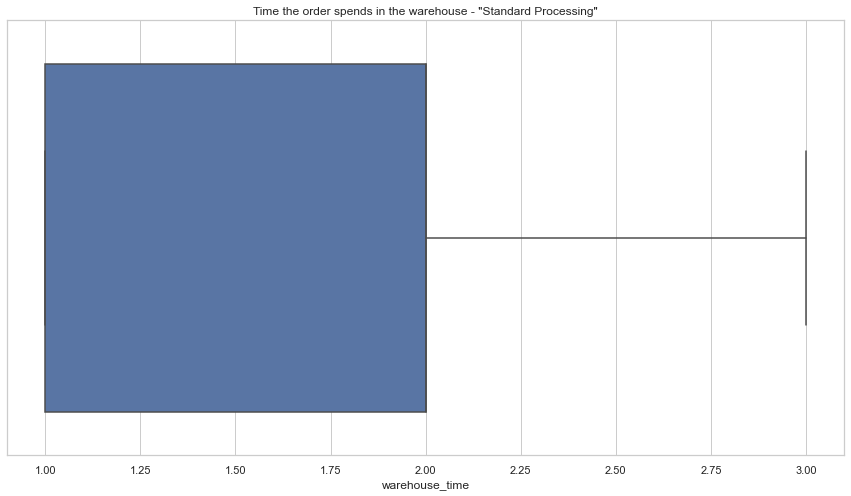

In [586]:
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset(process_time_cleaned)
ax = sns.boxplot(x=process_time_cleaned_standard["warehouse_time"]).set_title('Time the order spends in the warehouse - "Standard Processing"')

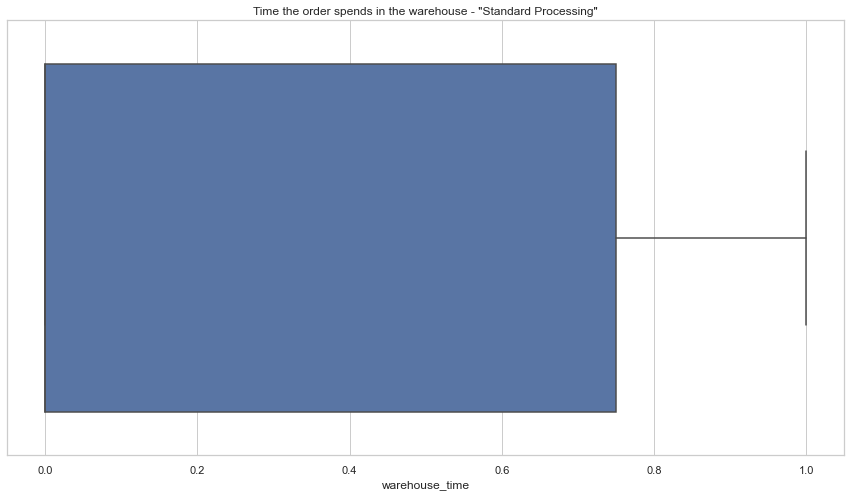

In [587]:
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset(process_time_cleaned)
ax = sns.boxplot(x=process_time_cleaned_express["warehouse_time"]).set_title('Time the order spends in the warehouse - "Standard Processing"')

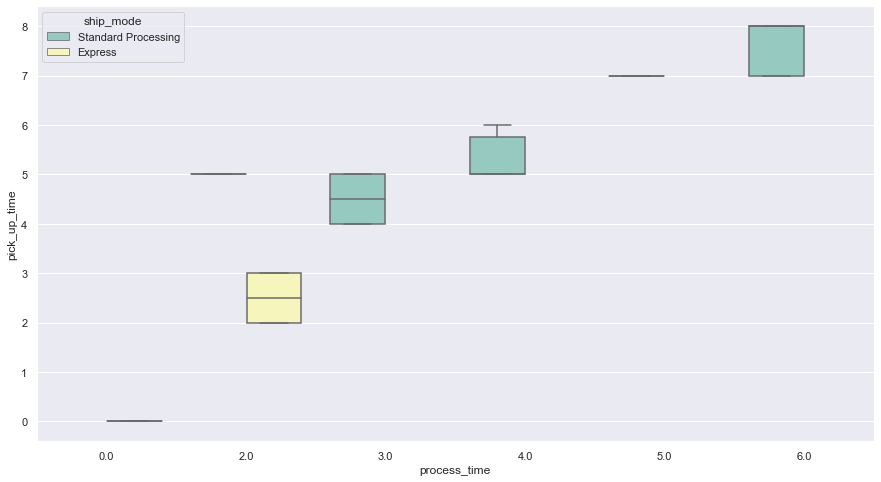

In [550]:
ax = sns.boxplot(x="process_time", y="pick_up_time", hue ="ship_mode",
                 data=process_time_cleaned, palette="Set3")

In [ ]:
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
                 data=tips, palette="Set3")

### Missing Postal Codes

In [335]:
big_beautiful_data_tree[['postal_code']] = big_beautiful_data_tree[['postal_code']].fillna(value=0)